In [1]:
from skimage.feature import blob_log
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from Util.sift.util import read_image_stack
import os, re, sys
from spot_util import detect_blobs
from display_util import draw_detections_1c
import statsmodels.formula.api as sm
from sklearn import preprocessing
import itertools
from scipy.optimize import curve_fit
from multiprocessing import Pool

%matplotlib inline

In [7]:



def cut(img, pos, size):
    pos = np.array(pos)
    size = np.array(size)
    interval = np.array(img.shape)
    mins = pos - (np.floor(size / 2))
    maxs = pos + (np.ceil(size / 2))
    
    #print(interval)
    
    to_pad = - np.min(mins) if np.min(mins) < 0 else (- np.min(interval - maxs) if np.min(interval - maxs) < 0 else 0)
    #to_pad = 0 if to_pad < 0 else to_pad
    #print(to_pad)
    mins += to_pad
    maxs += to_pad
    
    return np.pad(img, np.int(to_pad), 'constant')[mins[0]:maxs[0] , mins[1]:maxs[1], mins[2]:maxs[2]]
    
    print (mins, maxs)

def idxes(pos, size):
    pos = np.array(pos)
    size = np.array(size)
    mins = pos - (np.floor(size / 2))
    maxs = pos + (np.ceil(size / 2))
    
    return np.array(list(itertools.product(np.arange(mins[0], maxs[0]), np.arange(mins[1], maxs[1]), np.arange(mins[2], maxs[2]))))

def agauss(idx, *params):
    #print(idx)
    params = list(*params)
    #params = params
    return params[0] + params[1] * np.exp( -1/2 * ( (idx[0] - params[2])**2 / params[3]**2  + (idx[1] - params[4])**2 / params[5]**2 + (idx[2] - params[6])**2 / params[7]**2) )


def gausses(idxes, *params):
    return np.apply_along_axis(lambda x: agauss(x, params), 1, idxes)

def find_spot_lm(f):
    img = read_image_stack(f, True)
    dets = detect_blobs(np.array(img, np.float), [3, 3, 3], 5)
    
    if len(dets) == 1:
        
        _ys = cut(img, dets[0], [20, 20, 20]).ravel()
        _xs = idxes(dets[0], [20, 20, 20])
        
        pa, pcov = curve_fit(gausses, _xs, _ys, [0.0, np.max(img), dets[0][0], 1.0,  dets[0][1], 1.0, dets[0][2], 1.0])
        
        res = [pa[2], pa[4], pa[6]]
    else:
        res = [np.nan, np.nan, np.nan]

    
    print('finished file ' + f.split(os.sep)[-1])
    return res
    


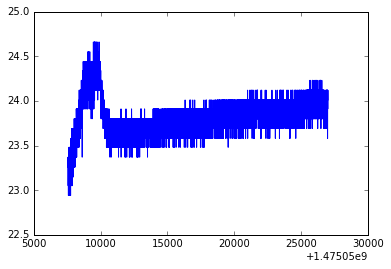

In [2]:
# load temp curve
temp_curve = pd.read_table('/Volumes/project_data/agl_data/Optimisation-Maintainance/DavidHoerl/STED/goldbeads_over_time/log.txt')
temp_curve = temp_curve[10:]
plt.plot(temp_curve.time, temp_curve.temp)

In [8]:
# plot maximum projections

path = '/Volumes/project_data/agl_data/Optimisation-Maintainance/DavidHoerl/STED/goldbeads_over_time/tiffs'
files = [f for f in next(os.walk(path))[2] if f.endswith('.tif')]

p = '.*?_t([0-9]+?)\..*?'

files.sort(key = lambda x : int(re.match(p, x).groups()[0]))
files_ = [os.path.join(path, f) for f in files]

times = []
xs = []
ys = []
zs = []


service = Pool()
dets = service.map(find_spot_lm, files_)



finished file 20160928_goldbeads_t1475063246.msrch0.tif
finished file 20160928_goldbeads_t1475062166.msrch0.tif
finished file 20160928_goldbeads_t1475061626.msrch0.tif
finished file 20160928_goldbeads_t1475062706.msrch0.tif
finished file 20160928_goldbeads_t1475061086.msrch0.tif
finished file 20160928_goldbeads_t1475063786.msrch0.tif
finished file 20160928_goldbeads_t1475060007.msrch0.tif
finished file 20160928_goldbeads_t1475060546.msrch0.tif
finished file 20160928_goldbeads_t1475063306.msrch0.tiffinished file 20160928_goldbeads_t1475062226.msrch0.tiffinished file 20160928_goldbeads_t1475061686.msrch0.tiffinished file 20160928_goldbeads_t1475062766.msrch0.tiffinished file 20160928_goldbeads_t1475061146.msrch0.tiffinished file 20160928_goldbeads_t1475063846.msrch0.tiffinished file 20160928_goldbeads_t1475060066.msrch0.tiffinished file 20160928_goldbeads_t1475060606.msrch0.tif







finished file 20160928_goldbeads_t1475063366.msrch0.tiffinished file 20160928_goldbeads_t1475062286.msrc

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will r

NameError: name 'f' is not defined









finished file 20160928_goldbeads_t1475064806.msrch0.tiffinished file 20160928_goldbeads_t1475068047.msrch0.tiffinished file 20160928_goldbeads_t1475065887.msrch0.tiffinished file 20160928_goldbeads_t1475065346.msrch0.tiffinished file 20160928_goldbeads_t1475068587.msrch0.tiffinished file 20160928_goldbeads_t1475066427.msrch0.tiffinished file 20160928_goldbeads_t1475067507.msrch0.tiffinished file 20160928_goldbeads_t1475066967.msrch0.tif







finished file 20160928_goldbeads_t1475068647.msrch0.tiffinished file 20160928_goldbeads_t1475073507.msrch0.tiffinished file 20160928_goldbeads_t1475069727.msrch0.tiffinished file 20160928_goldbeads_t1475069187.msrch0.tiffinished file 20160928_goldbeads_t1475071347.msrch0.tiffinished file 20160928_goldbeads_t1475070267.msrch0.tiffinished file 20160928_goldbeads_t1475071887.msrch0.tiffinished file 20160928_goldbeads_t1475070807.msrch0.tif







finished file 20160928_goldbeads_t1475068707.msrch0.tiffinished file 20160928_goldbeads_t1475073

In [9]:
for i in range(len(files)):
    t = int(re.match(p, files[i]).groups()[0])
    times.append(t)
    
    det = dets[i]    
    xs.append(det[0])
    ys.append(det[1])
    zs.append(det[2])

    #sys.stdout.write('\rfinished ' + str(i) + '/' + str(len(files)))
    #print('\rfinished ' + str(i) + '/' + str(len(files)))
    
pos_series = pd.DataFrame({'time' : times, 'x' : xs, 'y': ys, 'z' : zs})


                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     18.68
Date:                Fri, 30 Sep 2016   Prob (F-statistic):           6.82e-08
Time:                        14:18:04   Log-Likelihood:                -453.32
No. Observations:                 139   AIC:                             912.6
Df Residuals:                     136   BIC:                             921.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -1048.8854    213.713     -4.

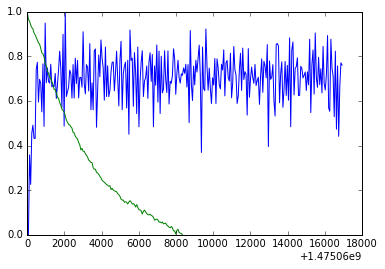

In [28]:


pos_series['temp'] = temp_curve.rolling(window=60,center=False).mean()[temp_curve.time.isin(pos_series.time)].reset_index().temp
pos_series
#print(pd.rolling_mean(temp_curve.temp, 60))

minmx = preprocessing.MinMaxScaler()
#print(pos_series.temp.diff())


fig, ax = plt.subplots()
ax.plot(pos_series.time[1:], minmx.fit_transform(pos_series.temp.diff()[1:].reshape(-1, 1)))
ax.plot(pos_series.dropna().time, minmx.fit_transform(pos_series.dropna().x.reshape(-1, 1)))

result =  sm.ols(formula="z ~ temp + I(temp.diff())", data=pos_series).fit()
print(result.summary())



In [ ]:
#plt.imshow(np.apply_along_axis(np.max, 2, img))
#np.cross(np.arange(0, 5), (np.arange(0,5)))
#print(np.array(list(itertools.product((np.arange(2), np.arange(3))))))

img = read_image_stack(os.path.join(path, files[0]), True)
dets = detect_blobs(np.array(img, np.float), [3, 3, 3], 5)

print(dets[0])
plt.imshow(np.apply_along_axis(np.max, 2, cut(img, dets[0], [20, 20, 20])))
plt.show()
ys = cut(img, dets[0], [20, 20, 20]).ravel()
xs = idxes(dets[0], [20, 20, 20])

#print(xs)

#print(gausses(xs, *[0.0, np.max(img), dets[0][0], 1.0,  dets[0][1], 1.0, dets[0][2], 1.0]))

pa, pcov = curve_fit(gausses, xs, ys, [0.0, np.max(img), dets[0][0], 1.0,  dets[0][1], 1.0, dets[0][2], 1.0])

plt.imshow(np.apply_along_axis(np.max, 2, gausses(xs, *pa).reshape(20, 20, 20)))
plt.show()
